# Exploratory Data Analysis for PD Sample 3


In [1]:
import pymongo
from pymongo import MongoClient

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

import plotly.express as px 

#### Connect to MongoDB

In [2]:
client = MongoClient('localhost', 27017)
db = client['pd-sample-3']
collection = db.outputItems

In [3]:
data = pd.DataFrame(list(collection.find()))
data.head()

,_id,url,text,school_id,depth,images,files
0,62421591bd15de7f73dabda2,https://www.madisonal.gov/219/Police,Skip to Main Content\n \n \n \n \n \n Loading\...,630283.0,1,[],[]
1,62421592bd15de7f73dabda4,https://www.dalycity.org/privacy,Skip to Main Content\n \n \n \n \n \n Loading\...,635588.0,1,[],[]
2,62421593bd15de7f73dabda6,https://www.madisonal.gov/privacy,Skip to Main Content\n \n \n \n \n \n \n Loadi...,630283.0,1,[],[]
3,62421594bd15de7f73dabda8,https://www.madisonal.gov/site/copyright,Skip to Main Content\n \n \n \n \n \n \n Loadi...,630283.0,1,[],[]
4,62421594bd15de7f73dabdaa,https://www.dalycity.org/copyright,Skip to Main Content\n \n \n \n \n \n \n Loadi...,635588.0,1,[],[]


In [4]:
data['school_id'].value_counts()

630283.0    4373
645690.0    3180
635588.0    2534
638546.0    1765
Name: school_id, dtype: int64

#### Average number of files & images

In [6]:
# data["image_count"] = data["image_urls"].apply(len)
# data["file_count"] = data["file_urls"].apply(len)

(array([   0.,  191., 1286., 2207., 4119., 4049.]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 6 artists>)

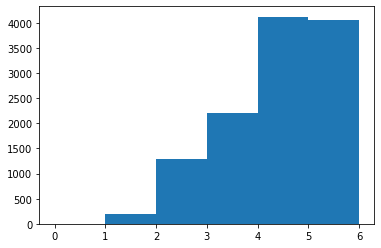

In [5]:
plt.hist(data.depth, bins=np.arange(6.1))

In [7]:
# plt.hist(data.image_count, bins=np.arange(0, 95.1, 5))

In [8]:
# plt.hist(data.file_count, bins=np.arange(6.1))

In [6]:
!mkdir ../pd-sample-3

In [7]:
for d in data['school_id'].unique():
    temp = data[data['school_id']==d]
    
    temp.to_csv(f'../pd-sample-3/{int(d)}.csv')